In [1]:
import numpy as np
from scipy import linalg as LA
import sympy as sp
from sympy.abc import m
import matplotlib.pyplot as plt
from itertools import product
import math

### Counting All Combinations

In [2]:

for n in range(1, 26):
    cnks = np.array([],dtype = int)
    for k in range(1, n):
        count = 0
        prod = product([1, 2], repeat = k)
        coins = list(prod)
        #print(coins)
        for coin in coins:
            #print("coin", coin)
            if sum(coin) == n-1:
                #print("here")
                count += 1
        
        cnks = np.append(cnks, count)
    #print(f'n = {n} | {cnk}' for cnk in cnks)
    print("n = ", n, "|",*(f'{cnk}' for cnk in cnks))
            

n =  1 |
n =  2 | 1
n =  3 | 1 1
n =  4 | 0 2 1
n =  5 | 0 1 3 1
n =  6 | 0 0 3 4 1
n =  7 | 0 0 1 6 5 1
n =  8 | 0 0 0 4 10 6 1
n =  9 | 0 0 0 1 10 15 7 1
n =  10 | 0 0 0 0 5 20 21 8 1
n =  11 | 0 0 0 0 1 15 35 28 9 1
n =  12 | 0 0 0 0 0 6 35 56 36 10 1
n =  13 | 0 0 0 0 0 1 21 70 84 45 11 1
n =  14 | 0 0 0 0 0 0 7 56 126 120 55 12 1
n =  15 | 0 0 0 0 0 0 1 28 126 210 165 66 13 1
n =  16 | 0 0 0 0 0 0 0 8 84 252 330 220 78 14 1
n =  17 | 0 0 0 0 0 0 0 1 36 210 462 495 286 91 15 1
n =  18 | 0 0 0 0 0 0 0 0 9 120 462 792 715 364 105 16 1
n =  19 | 0 0 0 0 0 0 0 0 1 45 330 924 1287 1001 455 120 17 1
n =  20 | 0 0 0 0 0 0 0 0 0 10 165 792 1716 2002 1365 560 136 18 1
n =  21 | 0 0 0 0 0 0 0 0 0 1 55 495 1716 3003 3003 1820 680 153 19 1
n =  22 | 0 0 0 0 0 0 0 0 0 0 11 220 1287 3432 5005 4368 2380 816 171 20 1
n =  23 | 0 0 0 0 0 0 0 0 0 0 1 66 715 3003 6435 8008 6188 3060 969 190 21 1
n =  24 | 0 0 0 0 0 0 0 0 0 0 0 12 286 2002 6435 11440 12376 8568 3876 1140 210 22 1
n =  25 | 0 0 0 0 0 0

In [3]:
prod = product([1, 2], repeat = 4)
coins = list(prod)
print(coins)
print(coins[0])
print(sum(coins[0]))

[(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 1), (1, 1, 2, 2), (1, 2, 1, 1), (1, 2, 1, 2), (1, 2, 2, 1), (1, 2, 2, 2), (2, 1, 1, 1), (2, 1, 1, 2), (2, 1, 2, 1), (2, 1, 2, 2), (2, 2, 1, 1), (2, 2, 1, 2), (2, 2, 2, 1), (2, 2, 2, 2)]
(1, 1, 1, 1)
4


### Calculating $T_{n,k}$ using Recurrence Relation

In [4]:
N = 41

# Intialising
Tnks = np.zeros([N, N], dtype = int)
Tnks[1, 1] = 0
Tnks[2, 1] = 1
Tnks[3, 1] = 1
Tnks[3, 2] = 1

for n in range(3, N):
    for k in range(2, N):
        Tnks[n, k] = Tnks[n-1, k-1] + Tnks[n-2, k-1]
#print(Tnks)

In [5]:
import pandas as pd

array = np.array([[1, 2], [3, 4]])
data = {
  f'k = {k}': Tnks[:, k] for k in range(0, N)
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df.iloc[[i for i in range(2, 13)], [j for j in range(1, 14)]]

,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9,k = 10,k = 11,k = 12,k = 13
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,2,1,0,0,0,0,0,0,0,0,0,0
5,0,1,3,1,0,0,0,0,0,0,0,0,0
6,0,0,3,4,1,0,0,0,0,0,0,0,0
7,0,0,1,6,5,1,0,0,0,0,0,0,0
8,0,0,0,4,10,6,1,0,0,0,0,0,0
9,0,0,0,1,10,15,7,1,0,0,0,0,0
10,0,0,0,0,5,20,21,8,1,0,0,0,0
11,0,0,0,0,1,15,35,28,9,1,0,0,0


In [6]:
df.iloc [[25], [i for i in range(11, 27)]]

,k = 11,k = 12,k = 13,k = 14,k = 15,k = 16,k = 17,k = 18,k = 19,k = 20,k = 21,k = 22,k = 23,k = 24,k = 25,k = 26
25,0,1,78,1001,5005,12870,19448,18564,11628,4845,1330,231,23,1,0,0


This allows us to calculate the probability of getting 25. 
$$ P_{25} = \sum_{k = 12}^{24} \frac{T_{25,k}}{2^k}.$$

In [7]:
answer = 0
for k in range(12, 25):
    answer += Tnks[25, k]/ 2**k

print(f"The probability of landing on step 5 at some point is {answer}")

The probability of landing on step 5 at some point is 0.6666666865348816


In [8]:
Pnks = np.zeros_like(Tnks, dtype = float)
for n in range(N):
    for k in range(N):
        Pnks[n, k] = Tnks[n, k] / 2**k

data = {
  f'k = {k}': Pnks[:, k] for k in range(0, N)
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df.iloc[[i for i in range(2, 13)], [j for j in range(1, 13)]]

,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9,k = 10,k = 11,k = 12
2,0.5,0.00,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.5,0.25,0.000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.50,0.125,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.0,0.25,0.375,0.0625,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.0,0.00,0.375,0.2500,0.03125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.0,0.00,0.125,0.3750,0.15625,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.0,0.00,0.000,0.2500,0.31250,0.093750,0.007812,0.000000,0.000000,0.000000,0.000000,0.0
9,0.0,0.00,0.000,0.0625,0.31250,0.234375,0.054688,0.003906,0.000000,0.000000,0.000000,0.0
10,0.0,0.00,0.000,0.0000,0.15625,0.312500,0.164062,0.031250,0.001953,0.000000,0.000000,0.0
11,0.0,0.00,0.000,0.0000,0.03125,0.234375,0.273438,0.109375,0.017578,0.000977,0.000000,0.0


In [9]:
Pns = np.zeros(N)
for n in range(N):
    Pns[n] = sum(Pnks[n, :])

print(Pns)

[0.         0.         0.5        0.75       0.625      0.6875
 0.65625    0.671875   0.6640625  0.66796875 0.66601562 0.66699219
 0.66650391 0.66674805 0.66662598 0.66668701 0.66665649 0.66667175
 0.66666412 0.66666794 0.66666603 0.66666698 0.66666651 0.66666675
 0.66666663 0.66666669 0.66666666 0.66666667 0.66666666 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]


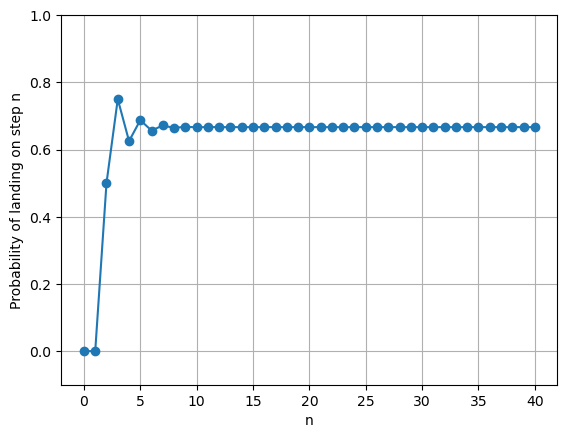

,n = 4,n = 5,n = 6,n = 7,n = 8,n = 9,n = 10,n = 11,n = 12,n = 13,n = 14
0,0.625,0.6875,0.65625,0.671875,0.664062,0.667969,0.666016,0.666992,0.666504,0.666748,0.666626


In [13]:
plt.figure()
plt.plot(np.arange(N), Pns, marker = 'o')
plt.savefig("Pn.png")
plt.xlabel("n")
plt.grid(True)
plt.ylim(-0.1,1)
plt.ylabel("Probability of landing on step n")
plt.show()

data = {
  f'n = {n}': [Pns[n]] for n in range(0, N)
}


#load data into a DataFrame object:
df = pd.DataFrame(data)

df.iloc[[0], [i for i in range(4, 15)]]

In [16]:
df.iloc[[0], [i for i in range(15, 25)]]

,n = 15,n = 16,n = 17,n = 18,n = 19,n = 20,n = 21,n = 22,n = 23,n = 24
0,0.666687,0.666656,0.666672,0.666664,0.666668,0.666666,0.666667,0.666667,0.666667,0.666667


In [17]:
df.iloc[[0], [i for i in range(25, 35)]]

,n = 25,n = 26,n = 27,n = 28,n = 29,n = 30,n = 31,n = 32,n = 33,n = 34
0,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667


### Convergence to 2/3?

In [19]:
def P(n):
    output = 0
    for k in range(int((n-1)/2), n):
        Tnk = math.comb(k, n-1-k)
        output += Tnk / 2**k
    
    return output

In [21]:
for n in range(30,N):
    pn = P(n)
    diff = pn - 2/3
    print(f'n = {n}, the difference between Pn and 2/3 is {diff}')

n = 30, the difference between Pn and 2/3 is -6.208816794028849e-10
n = 31, the difference between Pn and 2/3 is 3.1044089521259366e-10
n = 32, the difference between Pn and 2/3 is -1.552203920951456e-10
n = 33, the difference between Pn and 2/3 is 7.761025155872403e-11
n = 34, the difference between Pn and 2/3 is -3.8805070268210784e-11
n = 35, the difference between Pn and 2/3 is 1.9402590645256623e-11
n = 36, the difference between Pn and 2/3 is -9.70123981147708e-12
n = 37, the difference between Pn and 2/3 is 4.8506754168897714e-12
n = 38, the difference between Pn and 2/3 is -2.4252821972936545e-12
n = 39, the difference between Pn and 2/3 is 1.2126966097980585e-12
n = 40, the difference between Pn and 2/3 is -6.06292793747798e-13


### Simulate the game

In [22]:

def coinflip(N,n,steps):
    # N: the number of times we play the game
    # n: the number we want to land on
    # steps: the number of coin flips in each game
    count = 0
    
    for i in range(N):
        now = 1
        for j in range(steps):
            rng = np.random.default_rng()
            step = rng.choice([1,2])
            now += step
            if now == n:
                count += 1
                break
    
    return count / N

In [23]:
Ns = [1000, 10000, int(1e5), int(1e6)]
n = 25
steps = 27

for N in Ns:
    
    print(f"N = {N}, the relative frequency of landing on step {n} at some point is {coinflip(N,n, steps)}.")


N = 1000, the relative frequency of landing on step 25 at some point is 0.679.
N = 10000, the relative frequency of landing on step 25 at some point is 0.6669.
N = 100000, the relative frequency of landing on step 25 at some point is 0.66475.
N = 1000000, the relative frequency of landing on step 25 at some point is 0.666776.
